In [1]:
import medmnist
from medmnist import INFO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
def study_medmnist(data_flag):
    # 1. Setup and Metadata
    print(f" DATASET: {data_flag.upper()} ")
    
    if data_flag not in INFO:
        print(f"Error: {data_flag} not found in MedMNIST INFO.")
        return

    info = INFO[data_flag]
    DataClass = getattr(medmnist, info['python_class'])
    label_dict = info['label']
    
    print(f"\n[1. CLASS LABELS MAPPING]")
    label_df = pd.DataFrame(list(label_dict.items()), columns=['Class ID', 'Description'])
    display(label_df)
    
    train_dataset = DataClass(split='train', download=True, size=28)
    val_dataset = DataClass(split='val', download=True, size=28)
    test_dataset = DataClass(split='test', download=True, size=28)
    
    def get_counts(labels):
        unique, counts = np.unique(labels, return_counts=True)
        return dict(zip(unique, counts))

    train_counts = get_counts(train_dataset.labels.flatten())
    val_counts = get_counts(val_dataset.labels.flatten())
    test_counts = get_counts(test_dataset.labels.flatten())
    
    dist_data = []
    for cid, name in label_dict.items():
        dist_data.append({
            'Class': name,
            'Train': train_counts.get(int(cid), 0),
            'Val': val_counts.get(int(cid), 0),
            'Test': test_counts.get(int(cid), 0)
        })
    
    dist_df = pd.DataFrame(dist_data)
    dist_df['Total'] = dist_df['Train'] + dist_df['Val'] + dist_df['Test']
    
    print(f"\n[2. DATA DISTRIBUTION TABLE]")
    display(dist_df)
    
    # Imbalance Ratio
    counts_array = dist_df['Train'].values
    ir_ratio = np.max(counts_array) / np.min(counts_array)
    
    print(f"\n[3. IMBALANCE ANALYSIS]")
    print(f">> Imbalance Ratio (IR): {ir_ratio:.2f}")
    status = "Highly Imbalanced" if ir_ratio > 4 else "Relatively Balanced"
    print(f">> STATUS: {status}")

    # Plotting Distribution
    plt.figure(figsize=(10, 5))
    df_melted = dist_df.melt(id_vars='Class', value_vars=['Train', 'Val', 'Test'], 
                             var_name='Split', value_name='Count')
    sns.barplot(data=df_melted, x='Count', y='Class', hue='Split')
    plt.title(f'Sample Count per Class: {data_flag}')
    plt.show()
    
    print(f"\n[4. SAMPLE IMAGES FROM {data_flag.upper()}]")
    montage_img = train_dataset.montage(length=5)
    plt.figure(figsize=(6, 6))
    plt.imshow(montage_img)
    plt.title(f"Random Samples Grid: {data_flag}")
    plt.axis('off')
    plt.show()

    print(f"\n[5. IMAGE STATISTICS]")
    sample_img = train_dataset.imgs[0]
    print(f"Image Resolution: {sample_img.shape}")
    print(f"Channels: {info['n_channels']} ({'RGB' if info['n_channels']==3 else 'Grayscale'})")
    
    plt.figure(figsize=(10, 3))
    plt.hist(train_dataset.imgs.flatten(), bins=50, color='teal', alpha=0.7)
    plt.title(f"Pixel Intensity Distribution: {data_flag}")
    plt.xlabel("Pixel Value (0-255)")
    plt.ylabel("Frequency")
    plt.show()

 DATASET: BLOODMNIST 

[1. CLASS LABELS MAPPING]


,Class ID,Description
0,0,basophil
1,1,eosinophil
2,2,erythroblast
3,3,"immature granulocytes(myelocytes, metamyelocyt..."
4,4,lymphocyte
5,5,monocyte
6,6,neutrophil
7,7,platelet



[2. DATA DISTRIBUTION TABLE]


,Class,Train,Val,Test,Total
0,basophil,852,122,244,1218
1,eosinophil,2181,312,624,3117
2,erythroblast,1085,155,311,1551
3,"immature granulocytes(myelocytes, metamyelocyt...",2026,290,579,2895
4,lymphocyte,849,122,243,1214
5,monocyte,993,143,284,1420
6,neutrophil,2330,333,666,3329
7,platelet,1643,235,470,2348



[3. IMBALANCE ANALYSIS]
>> Imbalance Ratio (IR): 2.74
>> STATUS: Relatively Balanced


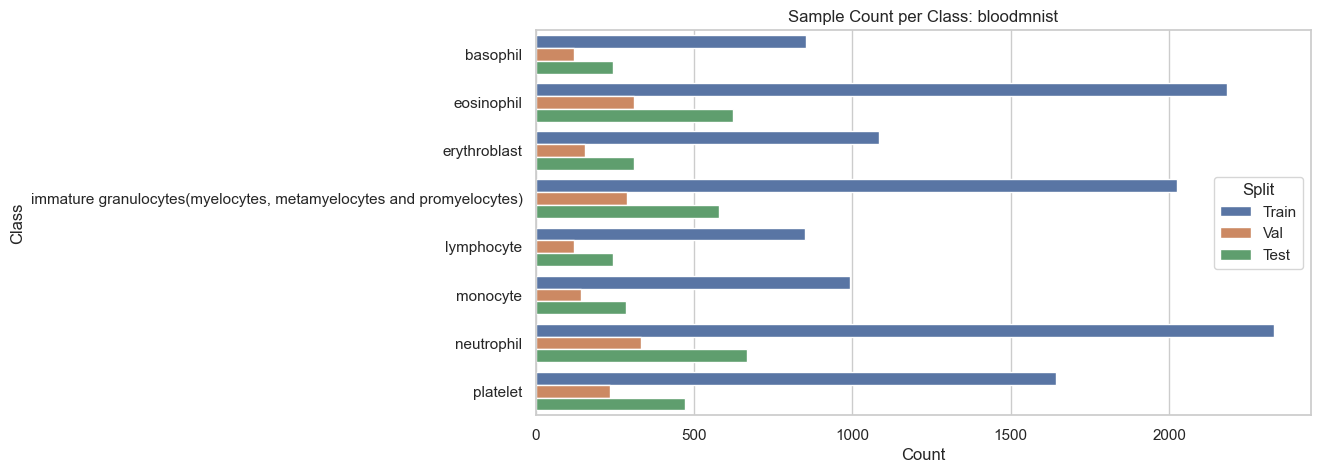


[4. SAMPLE IMAGES FROM BLOODMNIST]


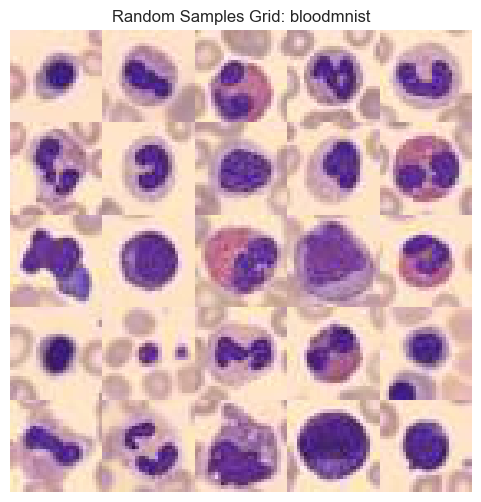


[5. IMAGE STATISTICS]
Image Resolution: (28, 28, 3)
Channels: 3 (RGB)


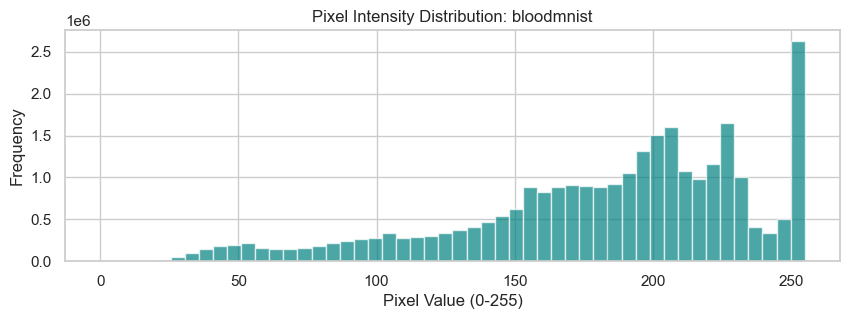

In [3]:
study_medmnist('bloodmnist')

 DATASET: DERMAMNIST 

[1. CLASS LABELS MAPPING]


,Class ID,Description
0,0,actinic keratoses and intraepithelial carcinoma
1,1,basal cell carcinoma
2,2,benign keratosis-like lesions
3,3,dermatofibroma
4,4,melanoma
5,5,melanocytic nevi
6,6,vascular lesions



[2. DATA DISTRIBUTION TABLE]


,Class,Train,Val,Test,Total
0,actinic keratoses and intraepithelial carcinoma,228,33,66,327
1,basal cell carcinoma,359,52,103,514
2,benign keratosis-like lesions,769,110,220,1099
3,dermatofibroma,80,12,23,115
4,melanoma,779,111,223,1113
5,melanocytic nevi,4693,671,1341,6705
6,vascular lesions,99,14,29,142



[3. IMBALANCE ANALYSIS]
>> Imbalance Ratio (IR): 58.66
>> STATUS: Highly Imbalanced


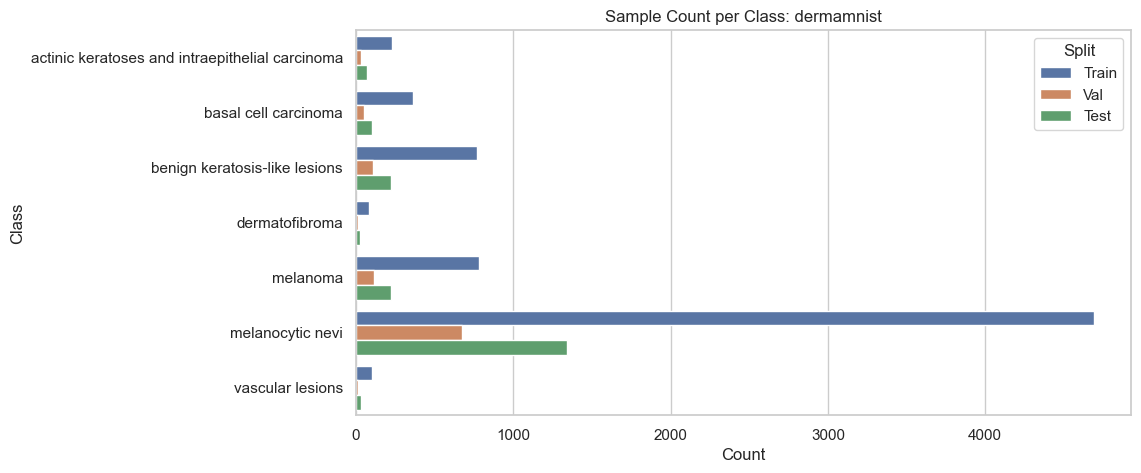


[4. SAMPLE IMAGES FROM DERMAMNIST]


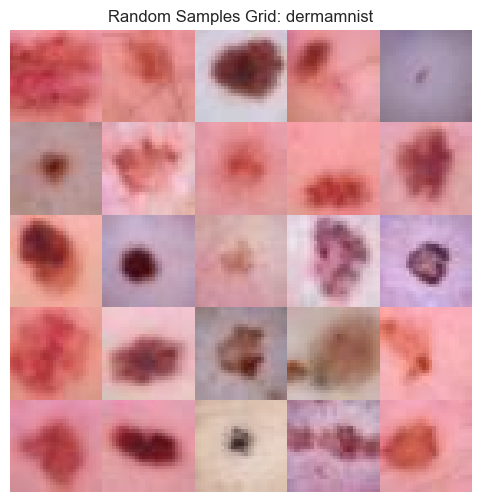


[5. IMAGE STATISTICS]
Image Resolution: (28, 28, 3)
Channels: 3 (RGB)


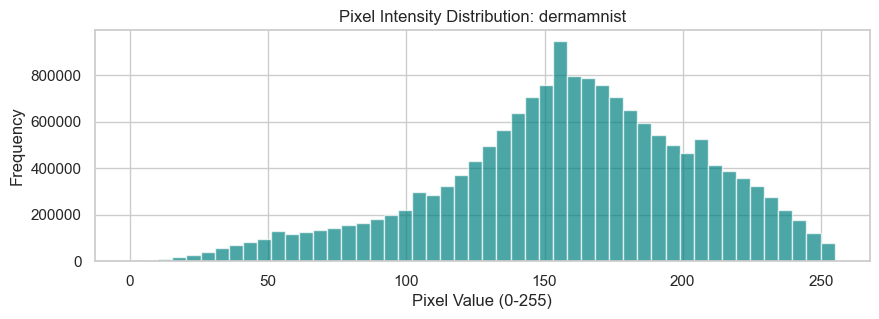

In [4]:
study_medmnist('dermamnist')

 DATASET: BREASTMNIST 

[1. CLASS LABELS MAPPING]


,Class ID,Description
0,0,malignant
1,1,"normal, benign"



[2. DATA DISTRIBUTION TABLE]


,Class,Train,Val,Test,Total
0,malignant,147,21,42,210
1,"normal, benign",399,57,114,570



[3. IMBALANCE ANALYSIS]
>> Imbalance Ratio (IR): 2.71
>> STATUS: Relatively Balanced


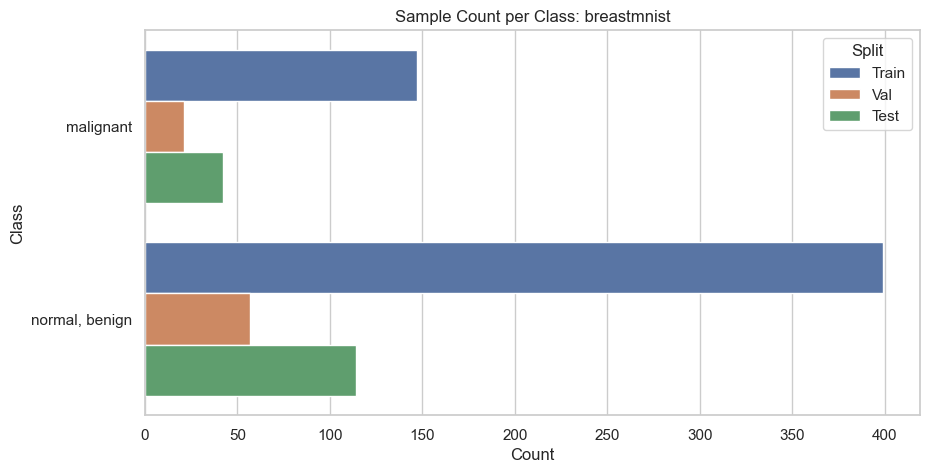


[4. SAMPLE IMAGES FROM BREASTMNIST]


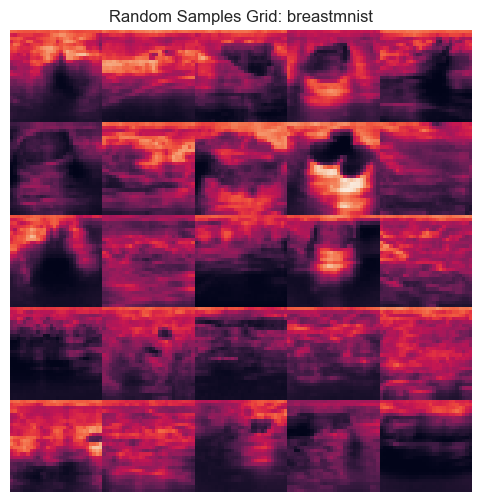


[5. IMAGE STATISTICS]
Image Resolution: (28, 28)
Channels: 1 (Grayscale)


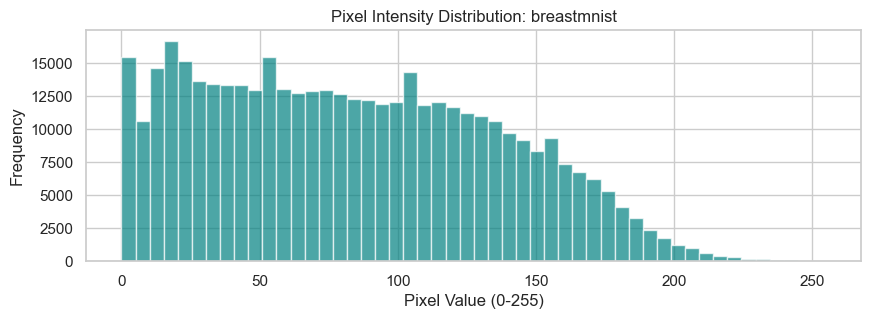

In [5]:
study_medmnist('breastmnist')

 DATASET: ORGANAMNIST 

[1. CLASS LABELS MAPPING]


,Class ID,Description
0,0,bladder
1,1,femur-left
2,2,femur-right
3,3,heart
4,4,kidney-left
5,5,kidney-right
6,6,liver
7,7,lung-left
8,8,lung-right
9,9,pancreas



[2. DATA DISTRIBUTION TABLE]


,Class,Train,Val,Test,Total
0,bladder,1956,321,1036,3313
1,femur-left,1390,233,784,2407
2,femur-right,1357,225,793,2375
3,heart,1474,392,785,2651
4,kidney-left,3963,568,2064,6595
5,kidney-right,3817,637,1965,6419
6,liver,6164,1033,3285,10482
7,lung-left,3919,1033,1747,6699
8,lung-right,3929,1009,1813,6751
9,pancreas,3031,529,1622,5182



[3. IMBALANCE ANALYSIS]
>> Imbalance Ratio (IR): 4.54
>> STATUS: Highly Imbalanced


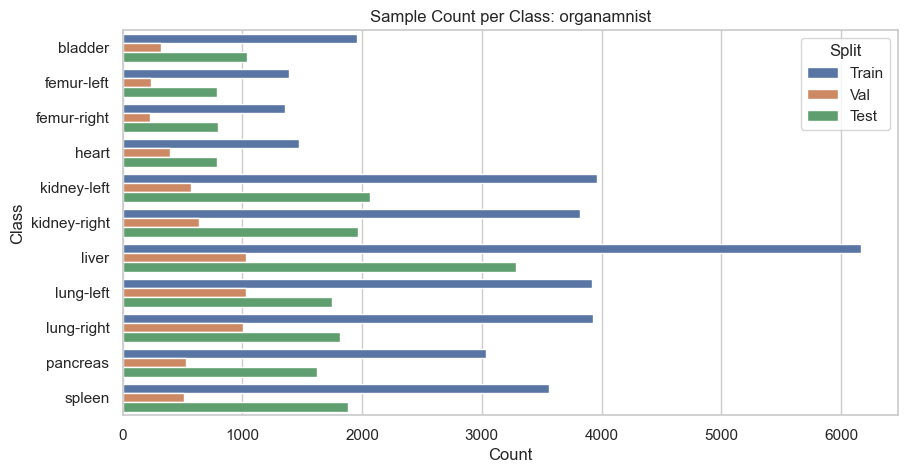


[4. SAMPLE IMAGES FROM ORGANAMNIST]


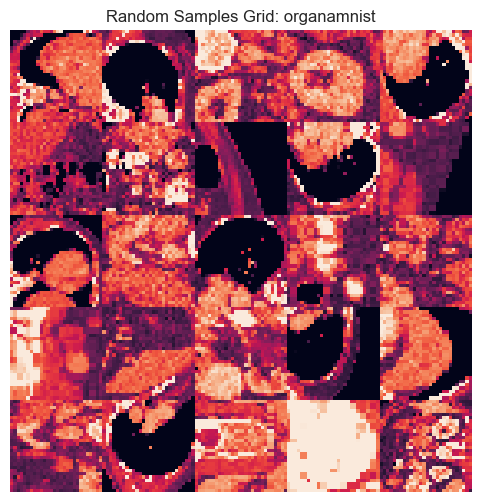


[5. IMAGE STATISTICS]
Image Resolution: (28, 28)
Channels: 1 (Grayscale)


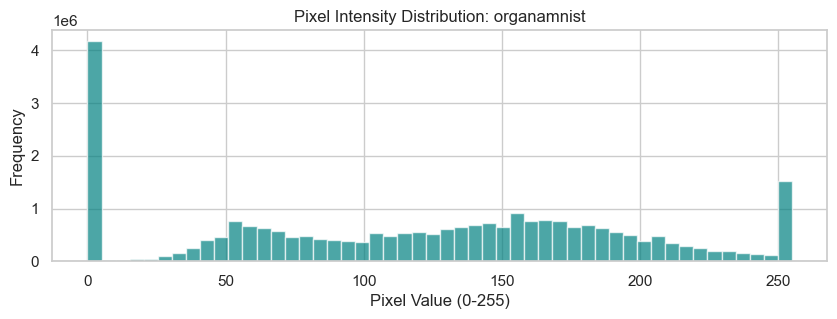

In [6]:
study_medmnist('organamnist')